# Import required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

Matplotlib is a library in Python that enables users to generate visualizations like histograms, scatter plots, bar charts, pie charts and much more. Seaborn is a visualization library that is built on top of Matplotlib. It provides data visualizations that are typically more aesthetic and statistically sophisticated.

# Load and show top 5 movies review data

In [2]:
df = pd.read_csv('IMDB Dataset.csv')
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

# Perform EDA

In [3]:
df.shape

(50000, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [6]:
df.describe()

review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000

In [7]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

Text(0.5, 1.0, 'Sentiment distribution')

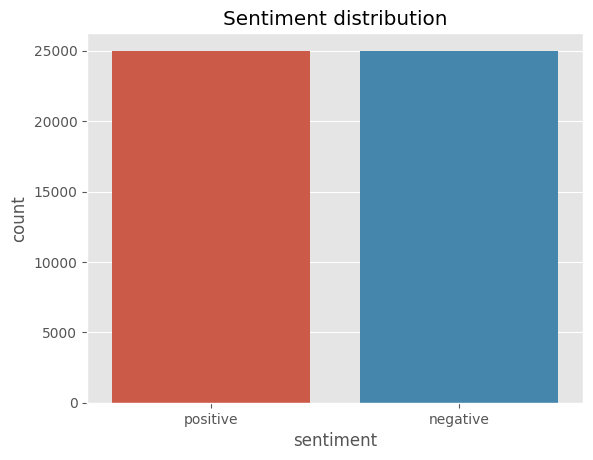

In [8]:
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment distribution")

In [9]:
for i in range(5):
    print("Review: ", [i])
    print(df['review'].iloc[i], "\n")
    print("Sentiment: ", df['sentiment'].iloc[i], "\n\n")

Review:  [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is d

In [10]:
def no_of_words(text):
    words= text.split()
    word_count = len(words)
    return word_count

In [11]:
df['word count'] = df['review'].apply(no_of_words)

In [12]:
df.head()

review sentiment  word count
0  One of the other reviewers has mentioned that ...  positive         307
1  A wonderful little production. <br /><br />The...  positive         162
2  I thought this was a wonderful way to spend ti...  positive         166
3  Basically there's a family where a little boy ...  negative         138
4  Petter Mattei's "Love in the Time of Money" is...  positive         230

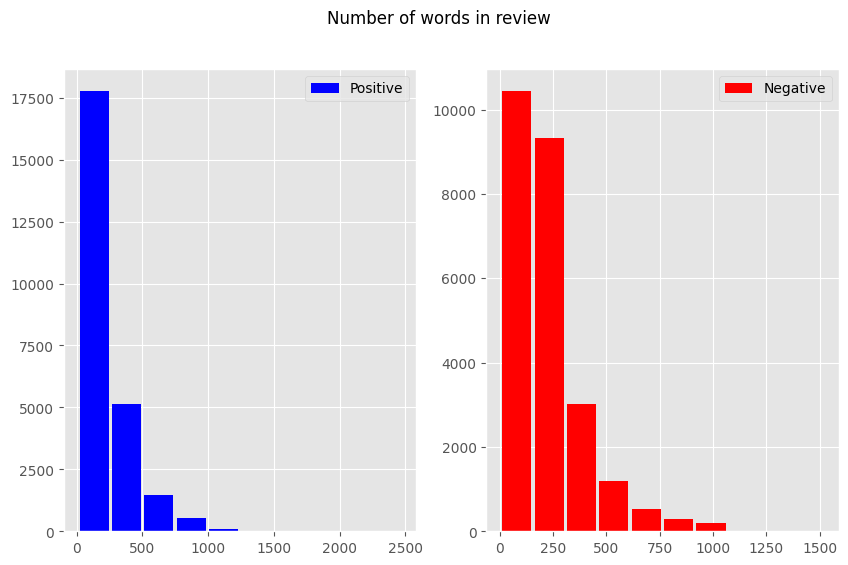

In [13]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(df[df['sentiment'] == 'positive']['word count'], label='Positive', color='blue', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['sentiment'] == 'negative']['word count'], label='Negative', color='red', rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Number of words in review")
plt.show()

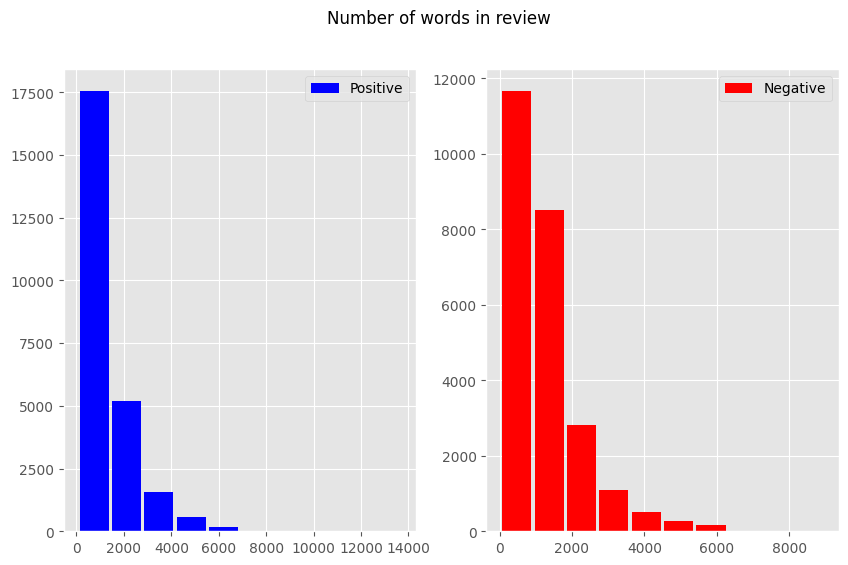

In [14]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(df[df['sentiment'] == 'positive']['review'].str.len(), label='Positive', color='blue', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['sentiment'] == 'negative']['review'].str.len(), label='Negative', color='red', rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Number of words in review")
plt.show()

# Apply LableEncoding to make the target feature into numerical (Positive: 1, Negative: 0)

In [15]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['sentiment'] =  label.fit_transform(df['sentiment'])
df.head()

review  sentiment  word count
0  One of the other reviewers has mentioned that ...          1         307
1  A wonderful little production. <br /><br />The...          1         162
2  I thought this was a wonderful way to spend ti...          1         166
3  Basically there's a family where a little boy ...          0         138
4  Petter Mattei's "Love in the Time of Money" is...          1         230

# Remove all special and numeric characters, unnecessary characters, symbols from data and also remove stopwords

In [16]:
def data_processing(text):
    text= text.lower()
    text = re.sub('<br />', '', text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [17]:
df.review = df['review'].apply(data_processing)

In [18]:
duplicated_count = df.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  421


In [19]:
df = df.drop_duplicates('review')

# Apply stemming

In [20]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [21]:
df.review = df['review'].apply(lambda x: stemming(x))

In [22]:
df['word count'] = df['review'].apply(no_of_words)
df.head()

review  sentiment  word count
0  one reviewers mentioned watching 1 oz episode ...          1         168
1  wonderful little production filming technique ...          1          84
2  thought wonderful way spend time hot summer we...          1          86
3  basically theres family little boy jake thinks...          0          67
4  petter matteis love time money visually stunni...          1         125

In [23]:
pos_reviews =  df[df.sentiment == 1]
pos_reviews.head()

review  sentiment  word count
0  one reviewers mentioned watching 1 oz episode ...          1         168
1  wonderful little production filming technique ...          1          84
2  thought wonderful way spend time hot summer we...          1          86
4  petter matteis love time money visually stunni...          1         125
5  probably alltime favorite movie story selfless...          1          58

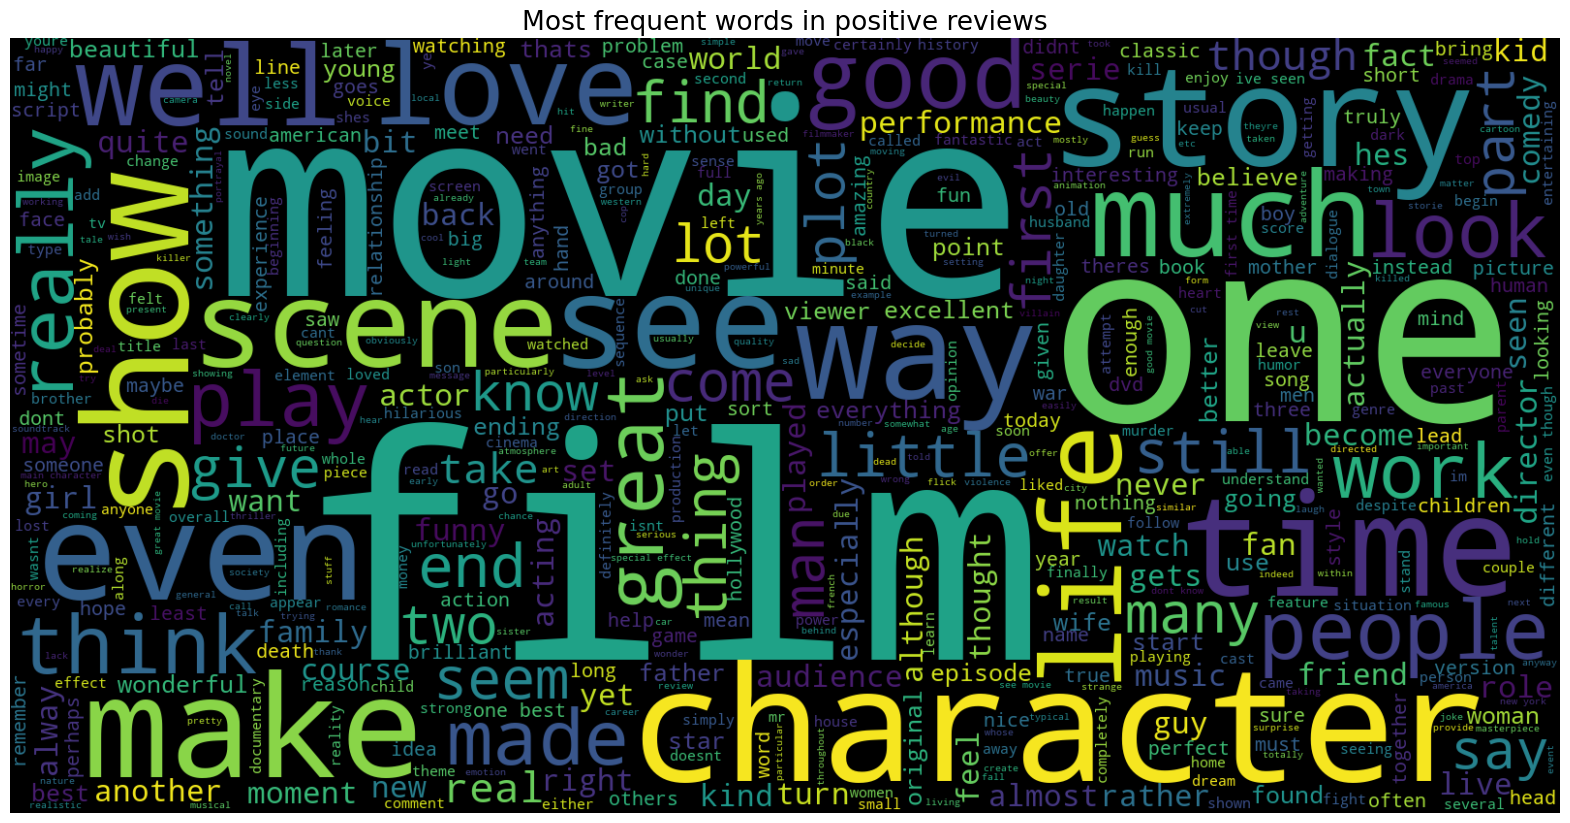

In [24]:
text = ' '.join([word for word in pos_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews', fontsize = 19)
plt.show()

In [25]:
from collections import Counter
count = Counter()
for text in pos_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('film', 39285),
 ('movie', 35830),
 ('one', 25621),
 ('like', 16998),
 ('good', 14281),
 ('great', 12568),
 ('story', 12338),
 ('see', 11814),
 ('time', 11724),
 ('well', 10930),
 ('really', 10638),
 ('also', 10516),
 ('would', 10320),
 ('even', 9318),
 ('much', 8971)]

In [26]:
pos_words = pd.DataFrame(count.most_common(15))
pos_words.columns = ['word', 'count']
pos_words.head()

word  count
0   film  39285
1  movie  35830
2    one  25621
3   like  16998
4   good  14281

In [27]:
px.bar(pos_words, x='count', y='word', title='Common words in positive reviews', color = 'word')

In [28]:
neg_reviews =  df[df.sentiment == 0]
neg_reviews.head()

review  sentiment  word count
3   basically theres family little boy jake thinks...          0          67
7   show amazing fresh innovative idea 70s first a...          0          83
8   encouraged positive comments film looking forw...          0          64
10  phil alien one quirky films humour based aroun...          0          51
11  saw movie 12 came recall scariest scene big bi...          0          84

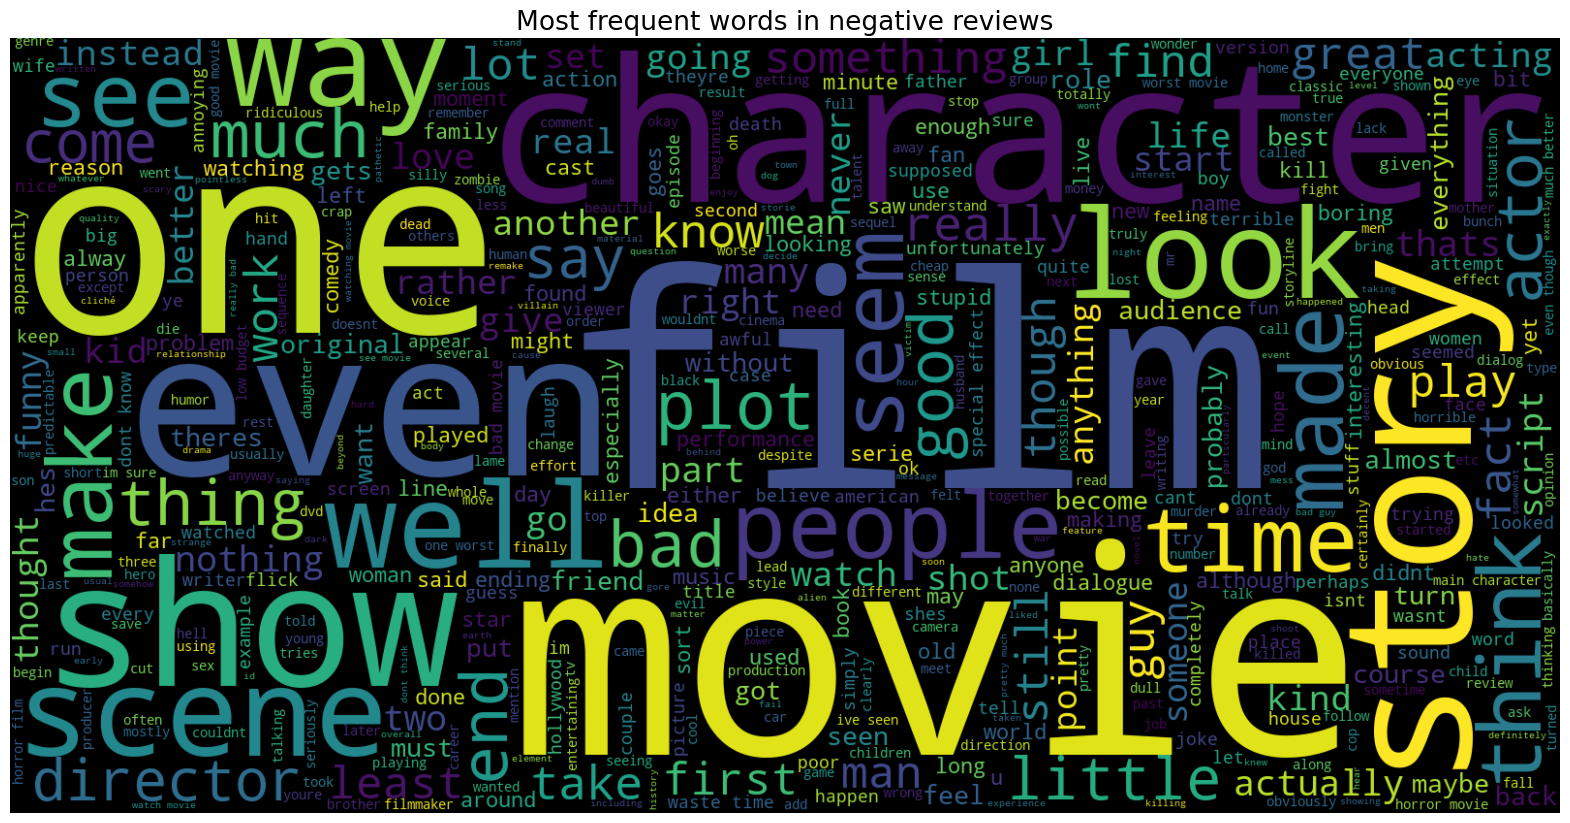

In [29]:
text = ' '.join([word for word in neg_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative reviews', fontsize = 19)
plt.show()

In [30]:
count = Counter()
for text in neg_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('movie', 47001),
 ('film', 34651),
 ('one', 24361),
 ('like', 21508),
 ('even', 14759),
 ('good', 13995),
 ('bad', 13903),
 ('would', 13482),
 ('really', 12084),
 ('time', 11349),
 ('see', 10412),
 ('dont', 9912),
 ('get', 9884),
 ('much', 9758),
 ('story', 9563)]

In [31]:
neg_words = pd.DataFrame(count.most_common(15))
neg_words.columns = ['word', 'count']
neg_words.head()

word  count
0  movie  47001
1   film  34651
2    one  24361
3   like  21508
4   even  14759

In [32]:
px.bar(neg_words, x='count', y='word', title='Common words in negative reviews', color = 'word')

# Divide data into independent and dependent

In [33]:
X = df['review']       #Independent variable
Y = df['sentiment']    #Dependent variable

# Apply TF - IDF Vectorizer to make text data into vectors

TfidfVectorizer class is used to transform the text data in the corpus into a TF-IDF matrix representation. The max_features parameter specifies the maximum number of features (words) to 
consider, limiting the vocabulary size to the top 5000 words by their TF-IDF scores.

In [34]:
vect = TfidfVectorizer()
X = vect.fit_transform(df['review'])

# Split data into train and test

In [35]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

In [36]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (24789, 221707)
Size of y_train:  (24789,)
Size of x_test:  (24789, 221707)
Size of y_test:  (24789,)


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Define Logistic Regression model

In [38]:
# Create an instance of the Logistic Regressor 
logreg = LogisticRegression()
# Train the regressor on the training data
logreg.fit(x_train, y_train)

logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 88.62%


In [39]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[10684  1562]
 [ 1260 11283]]


              precision    recall  f1-score   support

           0       0.89      0.87      0.88     12246
           1       0.88      0.90      0.89     12543

    accuracy                           0.89     24789
   macro avg       0.89      0.89      0.89     24789
weighted avg       0.89      0.89      0.89     24789



# Define naive-bayes model

In [40]:
# Create an instance of the MultinomialNB classifier
mnb = MultinomialNB()

# Train the classifier on the training data
mnb.fit(x_train, y_train)

mnb_pred = mnb.predict(x_test)
mnb_acc = accuracy_score(mnb_pred, y_test)
print("Test accuracy: {:.2f}%".format(mnb_acc*100))

Test accuracy: 86.09%


In [41]:
print(confusion_matrix(y_test, mnb_pred))
print("\n")
print(classification_report(y_test, mnb_pred))

[[10833  1413]
 [ 2036 10507]]


              precision    recall  f1-score   support

           0       0.84      0.88      0.86     12246
           1       0.88      0.84      0.86     12543

    accuracy                           0.86     24789
   macro avg       0.86      0.86      0.86     24789
weighted avg       0.86      0.86      0.86     24789



# Define LinearSVC model

LinearSVC, which stands for Linear Support Vector Classification. LinearSVC is a machine learning algorithm used for binary and multiclass classification tasks. It's a linear classifier that aims to find a hyperplane that best separates different classes in the feature space. 

In [42]:
# Create an instance of the LinearSVC classifier
svc = LinearSVC()

# Train the classifier on the training data
svc.fit(x_train, y_train)

svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))

Test accuracy: 88.87%


In [43]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[10766  1480]
 [ 1280 11263]]


              precision    recall  f1-score   support

           0       0.89      0.88      0.89     12246
           1       0.88      0.90      0.89     12543

    accuracy                           0.89     24789
   macro avg       0.89      0.89      0.89     24789
weighted avg       0.89      0.89      0.89     24789



# Hyper Parameter Tuning for Model

GridSearchCV class from scikit-learn to perform hyperparameter tuning for a Support Vector Machine (SVM) classifier. This is a common technique to find the best combination of hyperparameters for your model.

The GridSearchCV class performs a technique called k-fold cross-validation during the hyperparameter search process. Cross-validation is used to estimate the performance of a model on unseen data and to avoid overfitting.

In [44]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1, 1, 10, 100], 'loss':['hinge', 'squared_hinge']}
grid = GridSearchCV(svc, param_grid, refit=True, verbose = 3)
grid.fit(x_train, y_train)

#By default, cv=5, meaning it uses 5-fold cross-validation.

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .................C=0.1, loss=hinge;, score=0.870 total time=   0.0s
[CV 2/5] END .................C=0.1, loss=hinge;, score=0.861 total time=   0.0s
[CV 3/5] END .................C=0.1, loss=hinge;, score=0.871 total time=   0.0s
[CV 4/5] END .................C=0.1, loss=hinge;, score=0.865 total time=   0.0s
[CV 5/5] END .................C=0.1, loss=hinge;, score=0.869 total time=   0.0s
[CV 1/5] END .........C=0.1, loss=squared_hinge;, score=0.889 total time=   0.1s
[CV 2/5] END .........C=0.1, loss=squared_hinge;, score=0.880 total time=   0.1s
[CV 3/5] END .........C=0.1, loss=squared_hinge;, score=0.892 total time=   0.1s
[CV 4/5] END .........C=0.1, loss=squared_hinge;, score=0.884 total time=   0.1s
[CV 5/5] END .........C=0.1, loss=squared_hinge;, score=0.892 total time=   0.1s
[CV 1/5] END ...................C=1, loss=hinge;, score=0.892 total time=   0.3s
[CV 2/5] END ...................C=1, loss=hinge;,

GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'loss': ['hinge', 'squared_hinge']},
             verbose=3)

In [45]:
print("best cross validation score: {:.2f}".format(grid.best_score_))
print("best parameters: ", grid.best_params_)

best cross validation score: 0.89
best parameters:  {'C': 1, 'loss': 'hinge'}


# Evaluate your model's performance using the test data

In [46]:
svc = LinearSVC(C = 1, loss='hinge')
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))

Test accuracy: 89.12%


In [47]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[10793  1453]
 [ 1244 11299]]


              precision    recall  f1-score   support

           0       0.90      0.88      0.89     12246
           1       0.89      0.90      0.89     12543

    accuracy                           0.89     24789
   macro avg       0.89      0.89      0.89     24789
weighted avg       0.89      0.89      0.89     24789



# Difference between Actual and Predicted data

In [48]:
import numpy as np

In [49]:
pd.DataFrame(np.c_[y_test,svc_pred], columns=["Actual", "Predicted"])

Actual  Predicted
0           1          1
1           1          1
2           0          0
3           1          1
4           0          0
...       ...        ...
24784       1          1
24785       0          0
24786       1          1
24787       1          1
24788       1          1

[24789 rows x 2 columns]

# Save my trained LinearSVC model and TF-IDF Vectorizer

In [50]:
import pickle
pickle.dump(vect, open("count-Vectorizer.pkl", "wb"))
pickle.dump(svc, open('Movies_Review_Classification.pkl', "wb")) # 1:pos, 0:Neg

# Load my LinearSVC model and TF-IDF Vecotrizer

In [51]:
save_svc = pickle.load(open('count-Vectorizer.pkl','rb'))
model = pickle.load(open('Movies_Review_Classification.pkl', 'rb'))

# Define any function to test model

In [52]:
def test_model(sentence):
    sen = save_svc.transform([sentence]).toarray()
    res= model.predict(sen)[0]
    if res==1:
        return 'Positive review'
    else:
        return 'Negative review'

# Test first positive review and check that what does model predict and it predicted correct

In [53]:
sen  ="This is the wonderful movie of my life"
res= test_model(sen)
print(res)

Positive review


# Test second negative review and check that what does model predict and it predicted corrected

In [54]:
sen = 'This is the worst movie, I have ever seen in my life'
res = test_model(sen)
print(res)

Negative review
